# Reto Empleados 
## <b> Objetivo  </b>
1. <b> Evaluar:   </b> las características de un conjunto de datos con el fin de ver si son suficientes para la actividad en la que serán usados. 
2. <b> Crear: </b> nuevas características a partir de las existentes, que logren proporcionar una mayor información para la actividad en la que se usarán. 
3. <b> Eliminar: </b> las características que sean irrelevantes para el uso que se le dará al conjunto de datos.


## Bibliotecas  

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.highlight { background: white !important; }</style>"))


C:\Users\avazq\AppData\Local\Temp\ipykernel_9704\404125741.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as stats 
import sklearn

## Leer archivo csv 

In [76]:
EmpleadosAttrition = pd.read_csv('EmpleadosRETO.csv')
EmpleadosAttrition.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,1,997,4,Male,...,22,4,3,80,32,1,2,4,1,No
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,1,178,2,Male,...,20,4,4,80,7,0,3,2,0,No
2,21,Travel_Rarely,Sales,7 km,1,Marketing,1,1780,2,Male,...,13,3,2,80,1,3,3,0,1,Yes
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,1,1118,2,Male,...,19,3,4,80,18,4,3,6,4,No
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,1,582,2,Male,...,12,3,4,80,15,2,4,6,7,Yes


## <b> EDA sobre `EmpleadosAttrition` </b>

### <b> Objetivo: </b> : Eliminar las columna que con alta probabilidad (Estimada por mi) no tienen relación alguna con la salida 

1. Dentro de las instrucciones se mencionan que hay columnas que no aportan absolutamente nada a definir el desgaste de un empleado: Esas son las primeras que eliminaremos: 

  - `EmployeeCount`: número de empleados, todos tienen un 1
  - `EmployeeNumber`: ID del empleado, el cual es único para cada empleado
  - `Over18 `: mayores de edad, todos dicen “Y”
  -	`StandardHours`: horas de trabajo, todos tienen “80”


In [77]:
# Eliminar columnas de EmpleadosAttriation 
EmpleadosAttrition.drop([ 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace= True)

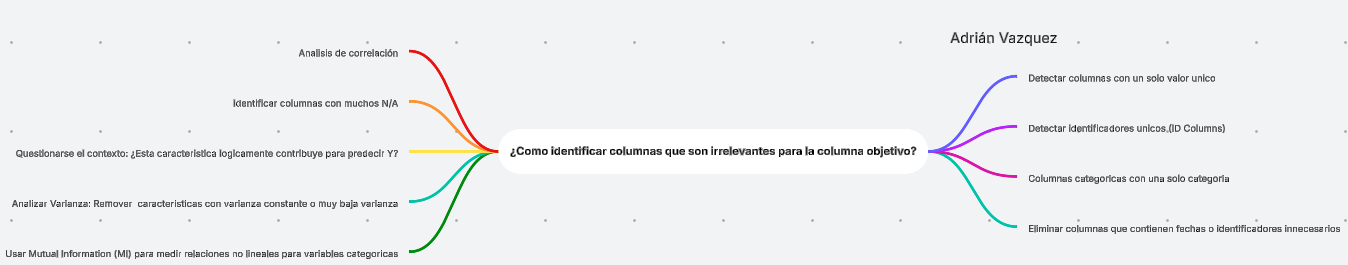

### Años que el empleado lleva en la compañia
- Calcular con la fecha de contratación: `HiringDate`. A partir de ella extraer el año de contratación y crear una columna `Year` donde guardarlo
- Crear una columna `YearsAtCompany`: Contiene los años que el empleado lleva en la compañia hasta el año 2018 : Resta entre `Year ` - 2018 

In [78]:
EmpleadosAttrition['HiringDate']

0      06/06/2013
1      12/25/2015
2       2/14/2017
3       7/29/2010
4      10/07/2011
          ...    
395    05/09/2013
396    04/02/2016
397     1/21/2008
398     8/27/2018
399    02/08/2010
Name: HiringDate, Length: 400, dtype: object

In [79]:
# convertir HiringDate en datetime 
EmpleadosAttrition['HiringDate'] = pd.to_datetime(EmpleadosAttrition['HiringDate'], errors = 'coerce') 
# Extraer el año y agregarlo en la nuerva columna 'Year'
EmpleadosAttrition['Year'] = EmpleadosAttrition['HiringDate'].dt.year
# Columna YearsAtCompany: Los años que lleva en la compañia 
EmpleadosAttrition['YearsAtCompany'] = 2018 - EmpleadosAttrition['Year']
# transfomormarlo a int 
EmpleadosAttrition['YearsAtCompany'] =  EmpleadosAttrition['YearsAtCompany'].fillna(0).astype(int)
EmpleadosAttrition[['YearsAtCompany']]

,YearsAtCompany
0,5
1,3
2,1
3,8
4,7
...,...
395,5
396,2
397,10
398,0


###  Crear la variable `DistanceFromHome`: Proviene de `DistanceFromHome_KM` y es una variable entera  


In [80]:
# Renombrar DistanceFromHome a DistanceFromHome_KM
EmpleadosAttrition = EmpleadosAttrition.rename(columns = {'DistanceFromHome': 'DistanceFromHome_km'})
# Nueva variable DistanceFromHome sin 'KM' y tipo entero 
EmpleadosAttrition['DistanceFromHome'] = EmpleadosAttrition['DistanceFromHome_km'].str.replace('km', '', regex= False).astype(int)
EmpleadosAttrition['DistanceFromHome']
                                             

0       1
1       6
2       7
3       7
4      15
       ..
395    14
396    20
397    11
398     4
399    14
Name: DistanceFromHome, Length: 400, dtype: int32

### <b> Borrar </b> las columnas `Year`, `HiringDate` y `DistanceFromHome_km` debido a que ya no son útiles. 

In [81]:
EmpleadosAttrition.drop(['Year', 'HiringDate' , 'DistanceFromHome_km' ], axis = 1 , inplace = True)

### Nuevo DataFrame  `SueldoPromedioDepto` que contenga el `MonthlyIncome` promedio por departamento `Department` de los empleados y colocarlo en una variable llamada `SueldoPromedio`  

In [82]:
# Nuevo DF con el MonthlyIncome promedio por departamento
SueldoPromedioDepto = EmpleadosAttrition.groupby('Department', as_index = False)['MonthlyIncome'].mean()
# cambiar el nombre a la columna 
SueldoPromedioDepto.rename(columns = {'MonthlyIncome' : 'SueldoPromedio'}, inplace= True)
SueldoPromedioDepto.head()

,Department,SueldoPromedio
0,Human Resources,6239.888889
1,Research & Development,6804.149813
2,Sales,7188.250000


### Dentro de `EmpleadosAttrition` escalar la variable `MonthlyIncome` para que tenga valores entre 0 y 1 

#### <b> ¿Que metodo de escalado usar?  </b>

# Métodos de Escalado y Cuándo Usarlos

| **Método**             | **Fórmula**                                      | **Cuándo Usarlo**                                                             | **Sensible a Outliers** |
|------------------------|--------------------------------------------------|-------------------------------------------------------------------------------|-------------------------|
| **Min-Max Scaling**    | $( X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}} )$  | Útil cuando los datos tienen rangos bien definidos o distribuciones uniformes. Funciona bien en redes neuronales. | ✅ Sí |
| **StandardScaler (Z-Score)** | $( X' = \frac{X - \mu}{\sigma} )$ | Ideal si la variable sigue una distribución normal o para modelos como regresión y PCA. | ❌ No |
| **RobustScaler**       | $( X' = \frac{X - \text{mediana}(X)}{\text{IQR}(X)} )$ | Para datos con outliers, ya que usa la mediana en lugar de la media. | ❌ No |
| **Log Transform**      | $( X' = \log(X) )$ | Cuando los datos tienen colas largas o distribuciones sesgadas (e.g., ingresos, precios de casas). | ❌ No |

## ¿Cómo Decidir?
- **Si los datos siguen una distribución normal** → Usa **StandardScaler**.
- **Si los datos están entre un rango fijo** (ejemplo: [0, 100]) → Usa **MinMaxScaler**.
- **Si hay outliers** → Usa **RobustScaler** o **log transform**.
- **Si usas un modelo basado en distancias** (KNN, SVM, PCA) → **Escalar es obligatorio**.
- **Si usas redes neuronales** → **MinMaxScaler** en el rango [0,1] o [-1,1] suele funcionar mejor.


count      400.000000
mean      6910.525000
std       4898.560091
min       1009.000000
25%       3037.000000
50%       5232.500000
75%       9784.500000
max      19973.000000
Name: MonthlyIncome, dtype: float64


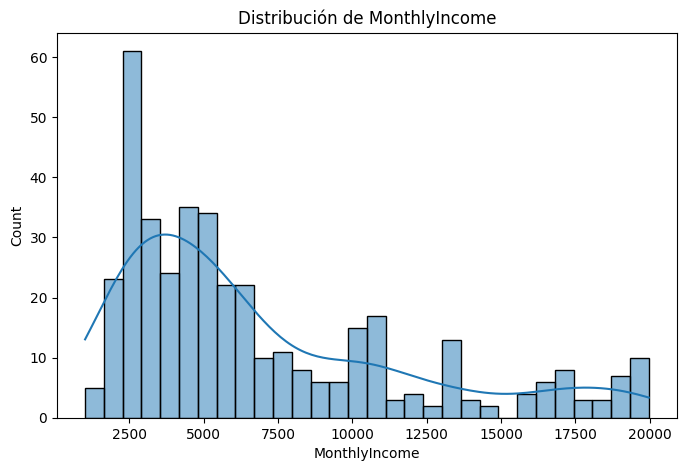

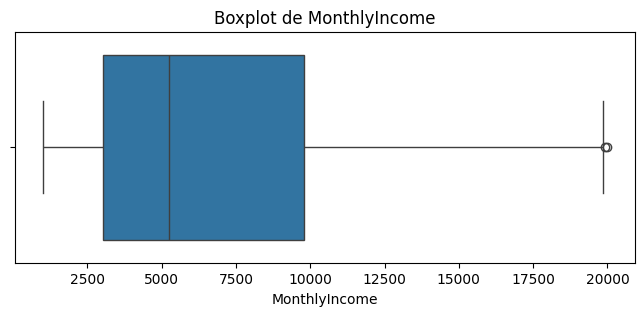

Shapiro-Wilk Test: Estadística=0.8490, p-valor=0.0000
La distribución NO es normal.


In [83]:
# Análisis exploratorio para escoger metodo escalado 
from scipy.stats import shapiro

# Descripción estadística de MonthlyIncome
print(EmpleadosAttrition["MonthlyIncome"].describe())

# Histograma para visualizar la distribución
plt.figure(figsize=(8,5))
sns.histplot(EmpleadosAttrition["MonthlyIncome"], bins=30, kde=True)
plt.title("Distribución de MonthlyIncome")
plt.show()

# Boxplot para identificar outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=EmpleadosAttrition["MonthlyIncome"])
plt.title("Boxplot de MonthlyIncome")
plt.show()

# Prueba de normalidad (Shapiro-Wilk Test)
stat, p_value = shapiro(EmpleadosAttrition["MonthlyIncome"].dropna())  # Eliminamos NaN
print(f"Shapiro-Wilk Test: Estadística={stat:.4f}, p-valor={p_value:.4f}")

if p_value > 0.05:
    print("La distribución es aproximadamente normal.")
else:
    print("La distribución NO es normal.")


#### <b> Conclusión </b>
1. <b> No sigue una distribución normal: </b> la grafica lo muestra y la prueba de normalidad lo confirma
2. <b> Existen outliers: </b>  Boxplot muestra valores atipicos por encima de 17,500
3. Metodos sensibles como MinMaxScaler o StandardScaler son sensibles ante valores atipicos, podrian no ser la mejor opción 
4. <b> Mejores opciones: RobustScaler o Log Transform ✅ </b>

In [84]:
# Aplicando Log Transform 
EmpleadosAttrition["MonthlyIncome_Log"] = np.log1p(EmpleadosAttrition["MonthlyIncome"])  # Log(1 + x) para evitar log(0)

EmpleadosAttrition[["MonthlyIncome", "MonthlyIncome_Log"]].head()


,MonthlyIncome,MonthlyIncome_Log
0,17399,9.764225
1,4941,8.505525
2,2679,7.893572
3,10445,9.253974
4,13610,9.518634


### <b> `Log Transform` + `MinMaxScaler` : Usar primero la transformación logarítmica reduce el sesgo, y luego aplicamos MinMaxScaler para ajustar los valores al rango [0,1]. </b>

In [85]:
from sklearn.preprocessing import MinMaxScaler
# Aplicar MinMaxScaler para llevar la variable al rango [0,1]
scaler = MinMaxScaler()
EmpleadosAttrition["MonthlyIncome_Scaled"] = scaler.fit_transform(EmpleadosAttrition[["MonthlyIncome_Log"]])
EmpleadosAttrition[["MonthlyIncome", "MonthlyIncome_Log", "MonthlyIncome_Scaled"]].head()

,MonthlyIncome,MonthlyIncome_Log,MonthlyIncome_Scaled
0,17399,9.764225,0.953774
1,4941,8.505525,0.532025
2,2679,7.893572,0.326980
3,10445,9.253974,0.782806
4,13610,9.518634,0.871484


In [86]:
# Sustituir MonthlyIncome_Log en MonthlyIncome
# eliminar MonthlyIncome 
EmpleadosAttrition.drop(['MonthlyIncome', 'MonthlyIncome_Log' ], axis = 1, inplace= True)
EmpleadosAttrition.rename(columns = {'MonthlyIncome_Scaled': 'MonthlyIncome'}, inplace=True)
EmpleadosAttrition['MonthlyIncome']

0      0.953774
1      0.532025
2      0.326980
3      0.782806
4      0.871484
         ...   
395    0.295133
396    0.505070
397    0.834429
398    0.397420
399    0.336471
Name: MonthlyIncome, Length: 400, dtype: float64

### Convertir las variables categoricas en númericas
1. `BusinessTravel`
2.	`Department`
3.	`EducationField`
4.	`Gender`
5.	`JobRole`
6.	`MaritalStatus`
7.	`Attrition`


In [87]:

# Lista de columnas categóricas a convertir
categorical_cols = ['OverTime','BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'Attrition']

# Aplicar One-Hot Encoding en EmpleadosAttrition
EmpleadosAttrition = pd.get_dummies(EmpleadosAttrition, columns=categorical_cols, drop_first=True) # <- drop_first: reduce colinealidad eliminando 1r categoria de cada variable

# Convertir solo las columnas nuevas de dummies (sin afectar las demás)
dummy_cols = [col for col in EmpleadosAttrition.columns if any(cat in col for cat in categorical_cols)]
EmpleadosAttrition[dummy_cols] = EmpleadosAttrition[dummy_cols].astype(int)


# Mostrar resultado
EmpleadosAttrition.head()


,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes
0,50,2,4,3,4,4,9,22,4,3,...,0,0,0,1,0,0,0,0,0,0
1,36,2,2,3,2,2,6,20,4,4,...,0,0,1,0,0,0,0,0,0,0
2,21,1,2,3,1,2,1,13,3,2,...,0,0,0,0,0,0,1,0,1,1
3,52,4,2,3,3,2,7,19,3,4,...,0,0,0,0,0,0,0,0,1,0
4,33,1,2,3,3,3,7,12,3,4,...,0,1,0,0,0,0,0,1,0,1


### Calcular la correlación entre las caracteristicas y la columna objetivo `Attrition_Yes`

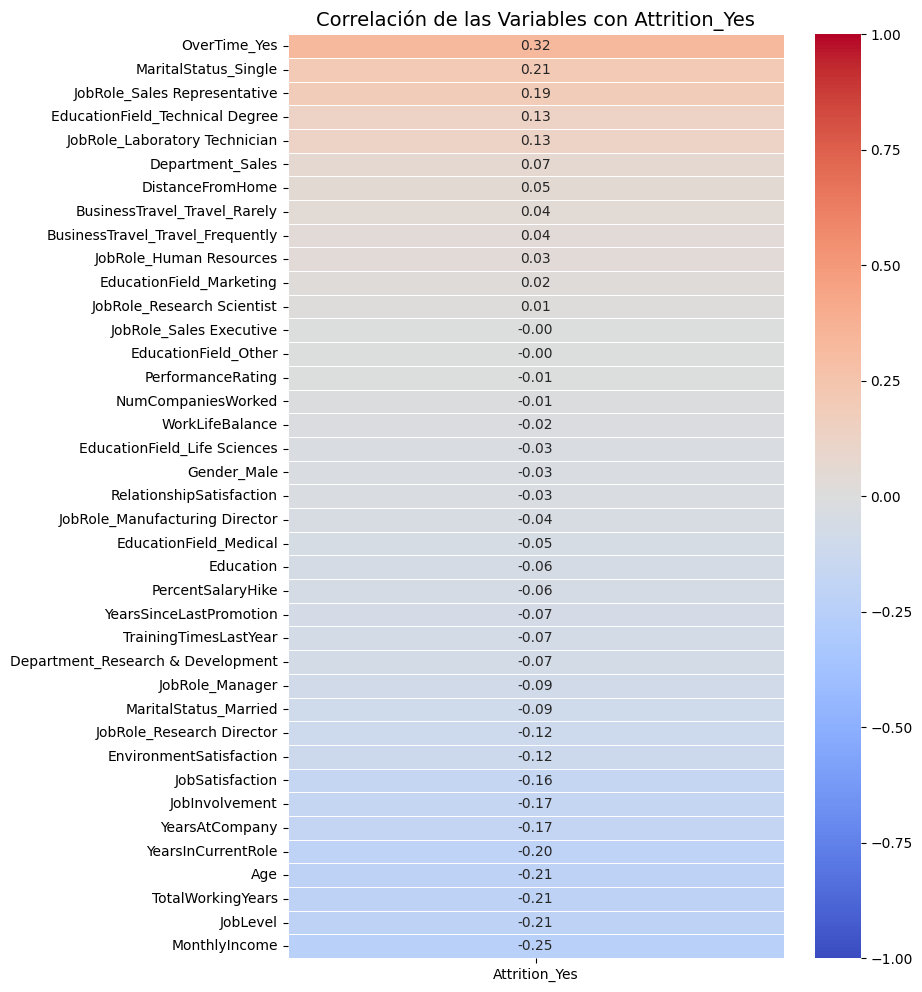

In [88]:

# Calcular la correlación de todas las variables con respecto a Attrition_Yes
correlation_matrix = EmpleadosAttrition.corr()

# Extraer solo la correlación con Attrition_Yes y ordenarlas de mayor a menor
attrition_corr = correlation_matrix['Attrition_Yes'].drop('Attrition_Yes').sort_values(ascending=False)


# Convertir la serie en una matriz 2D transponiéndola
attrition_corr_matrix = attrition_corr.to_frame()

# Crear heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(attrition_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Título del heatmap
plt.title("Correlación de las Variables con Attrition_Yes", fontsize=14)

# Mostrar gráfico
plt.show()


In [89]:
attrition_corr

OverTime_Yes                         0.324777
MaritalStatus_Single                 0.205849
JobRole_Sales Representative         0.191294
EducationField_Technical Degree      0.129104
JobRole_Laboratory Technician        0.125264
Department_Sales                     0.066116
DistanceFromHome                     0.052732
BusinessTravel_Travel_Rarely         0.042755
BusinessTravel_Travel_Frequently     0.035387
JobRole_Human Resources              0.032714
EducationField_Marketing             0.016768
JobRole_Research Scientist           0.007977
JobRole_Sales Executive             -0.003115
EducationField_Other                -0.004275
PerformanceRating                   -0.006471
NumCompaniesWorked                  -0.009082
WorkLifeBalance                     -0.021723
EducationField_Life Sciences        -0.027457
Gender_Male                         -0.028839
RelationshipSatisfaction            -0.030945
JobRole_Manufacturing Director      -0.042404
EducationField_Medical            

### Seleccionar las variables con una correlación mayor o igual a 0.1

In [90]:
# Definir umbral de correlación mínima
umbral = 0.1

# Calcular la correlación de todas las variables con Attrition_Yes
correlation_matrix = EmpleadosAttrition.corr()

# Seleccionar solo las variables con correlación absoluta >= 0.1
correlated_features = correlation_matrix['Attrition_Yes'] >= umbral

# Mantener solo las columnas que cumplen la condición
selected_columns = correlated_features[correlated_features].index

# Crear un nuevo DataFrame con las variables filtradas
EmpleadosAttritionFinal = EmpleadosAttrition[selected_columns]

# Mostrar las primeras filas del nuevo DataFrame
EmpleadosAttritionFinal.head()


,OverTime_Yes,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Sales Representative,MaritalStatus_Single,Attrition_Yes
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,1,1,1
3,0,0,0,0,1,0
4,1,0,0,0,0,1


### <b> PCA: </b> Crear una nueva variable llamada `EmpleadosAttritionPCA` formada por los componentes principales del df `EmpleadosAttritionFinal`

In [91]:
from sklearn.decomposition import PCA

# Definir el número de componentes principales
num_componentes = min(EmpleadosAttritionFinal.shape[0], EmpleadosAttritionFinal.shape[1])

# Aplicar PCA
pca = PCA(n_components=num_componentes)
EmpleadosAttritionPCA = pca.fit_transform(EmpleadosAttritionFinal)

# Mostrar la forma del nuevo array
print("Forma de EmpleadosAttritionPCA:", EmpleadosAttritionPCA.shape)

# Acceder a la primera columna del PCA
print("Primera columna (Primer Componente Principal):")
print(EmpleadosAttritionPCA[:, 0])

Forma de EmpleadosAttritionPCA: (400, 6)
Primera columna (Primer Componente Principal):
[-0.41865799 -0.41865799  0.73238095  0.12988815  0.74870823  0.23237114
 -0.41865799  0.23237114 -0.41865799  0.12988815 -0.41998842 -0.41865799
  1.29725437  0.0976791  -0.41865799 -0.41865799 -0.38492225 -0.41865799
  0.12988815 -0.41865799 -0.41865799  0.23237114  0.12988815  0.7473778
 -0.41865799  0.23237114  1.29725437  0.23237114 -0.41865799  0.23237114
 -0.41998842  0.74870823 -0.41865799 -0.41998842  0.12988815  0.23237114
  0.26743731 -0.41865799 -0.41865799  0.12988815 -0.41865799  0.12855772
 -0.41865799  0.23237114  0.74870823 -0.41865799 -0.41865799 -0.41865799
  0.23237114  0.23237114 -0.41865799  0.23237114 -0.41865799  0.12988815
  0.12988815 -0.41998842  0.7473778  -0.41865799  0.78091728  0.21604386
  0.12988815 -0.41865799  0.23237114 -0.41865799 -0.41865799  0.26743731
 -0.41865799 -0.41865799 -0.41865799 -0.41865799  0.12988815  0.12988815
 -0.41998842 -0.41998842 -0.41865799 

### Obtener el minino de componentes principales que expliquen el 80% de varianza y agregarlas al df `EmpleadosAttritionFinal`

Número mínimo de componentes que explican al menos el 80% de la varianza: 4


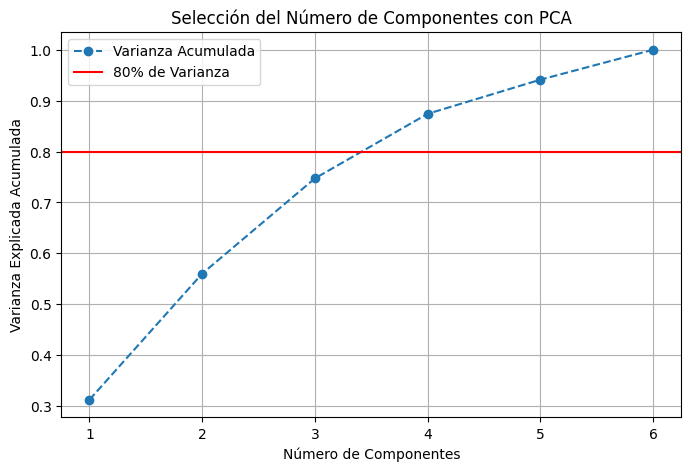

,OverTime_Yes,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Sales Representative,MaritalStatus_Single,Attrition_Yes,C0,C1,C2,C3
0,0,0,0,0,0,0,-0.418658,0.025340,-0.139366,0.082370
1,0,0,0,0,0,0,-0.418658,0.025340,-0.139366,0.082370
2,0,0,0,1,1,1,0.732381,-0.770272,0.132097,0.846814
3,0,0,0,0,1,0,0.129888,-0.755010,-0.129133,-0.202455
4,1,0,0,0,0,1,0.748708,0.716183,-0.077530,0.413427


In [92]:
# Definir el número máximo de componentes principales
num_componentes = min(EmpleadosAttritionFinal.shape[0], EmpleadosAttritionFinal.shape[1])

# Aplicar PCA con el número máximo de componentes
pca = PCA(n_components=num_componentes)
EmpleadosAttritionPCA = pca.fit_transform(EmpleadosAttritionFinal)

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número mínimo de componentes que explican al menos el 80% de la varianza
num_componentes_optimos = np.argmax(varianza_acumulada >= 0.80) + 1

print(f"Número mínimo de componentes que explican al menos el 80% de la varianza: {num_componentes_optimos}")

# Aplicar PCA nuevamente con el número óptimo de componentes
pca_final = PCA(n_components=num_componentes_optimos)
EmpleadosAttritionPCA_reducido = pca_final.fit_transform(EmpleadosAttritionFinal)

# Convertir los componentes en un DataFrame con nombres C0, C1, C2
columnas_pca = [f"C{i}" for i in range(num_componentes_optimos)]
df_pca = pd.DataFrame(EmpleadosAttritionPCA_reducido, columns=columnas_pca)

# Agregar las columnas de PCA al DataFrame original
EmpleadosAttritionFinal = EmpleadosAttritionFinal.assign(**df_pca)

# Visualizar la varianza acumulada para entender la selección de componentes
plt.figure(figsize=(8,5))
plt.plot(range(1, num_componentes+1), varianza_acumulada, marker='o', linestyle='--', label="Varianza Acumulada")
plt.axhline(y=0.80, color='r', linestyle='-', label="80% de Varianza")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número de Componentes con PCA")
plt.legend()
plt.grid()
plt.show()

# Mostrar las primeras filas del DataFrame actualizado
EmpleadosAttritionFinal.head()

### Guardar el set de datos EmpleadosAttritionfinal y mover al final la columna `Attrition_Yes`

In [94]:
# Mover la columna Attrition_Yes al final
columnas = [col for col in EmpleadosAttritionFinal.columns if col != "Attrition_Yes"]  # Lista de columnas sin Attrition_Yes
columnas.append("Attrition_Yes")  # Agregar Attrition_Yes al final

# Reordenar el DataFrame con la nueva lista de columnas
EmpleadosAttritionFinal = EmpleadosAttritionFinal[columnas]

# Guardar el DataFrame en un archivo CSV
EmpleadosAttritionFinal.to_csv("EmpleadosAttritionFinal.csv", index=False)

# Mostrar las primeras filas del DataFrame actualizado
EmpleadosAttritionFinal.head()

,OverTime_Yes,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Sales Representative,MaritalStatus_Single,C0,C1,C2,C3,Attrition_Yes
0,0,0,0,0,0,-0.592072,0.035836,-0.197093,0.116489,0
1,0,0,0,0,0,-0.592072,0.035836,-0.197093,0.116489,0
2,0,0,0,1,1,1.035743,-1.089328,0.186813,1.197577,1
3,0,0,0,0,1,0.183690,-1.067745,-0.182622,-0.286314,0
4,1,0,0,0,0,1.058833,1.012836,-0.109644,0.584674,1


In [2]:
import pdfkit

pdfkit.from_file("RetoEmpleados.html", "RetoEmpleados.pdf")


ModuleNotFoundError: No module named 'pdfkit'